# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# checking for duplicate
df.duplicated().sum()

0

In [5]:
# checking the number of row and column of the dataframe
df.shape[0], df.shape[1]

(1898, 9)

In [6]:
# checking if order_id is an unique value
df['order_id'].nunique()

1898

#### Observations: 
* The data frame consists of 9 columns and 1898 rows  
* There is no duplicate row in the data frame
* The number of row is equal to the number of unique value of order_id. Therefore, we can confirm that order_id is the unique value of the data frame

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are 5 numerical columns in the data and 4 object type columns.





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There is no missing value in the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
* Cost of the order: The average cost of the order is around 16.5 usd, which is very near to the median value 14.1 usd. Around 50% of the orders is lower than 14.1 usd, while the cheapest order is only around 4.5 usd.
* Food preparation time: The mean and median are almost equal to each other with the value of around 27 minutes. While the maximum and minimum time for the food to be prepared is 35 and 20 minutes respectively.
* Delivery time: It will take around 15 to 33 minutes for the orders to be transported from the restaurants to the customers. While 75% of the orders are delivered within 28 minutes and the shortest ride takes only 15 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
df.loc[df['rating'] =='Not given'].shape


(736, 9)

In [11]:
df.loc[df['rating'] =='Not given','cuisine_type'].value_counts().head(5)

American    216
Japanese    197
Italian     126
Chinese      82
Mexican      29
Name: cuisine_type, dtype: int64

#### Observations:
* There are 736 orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

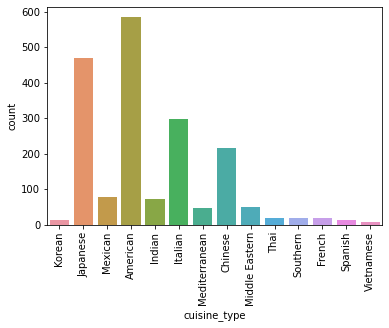

In [12]:
sns.countplot(data=df,x= 'cuisine_type')
plt.xticks(rotation=90)
plt.show()


#### Observation:
* The top 3 most popular cuisine type are American, Japanese and Italian.
* Meanwhile, Thai, Korean, Southern, French, Spanish and Vietnamese constitute a very small portion of the orders.



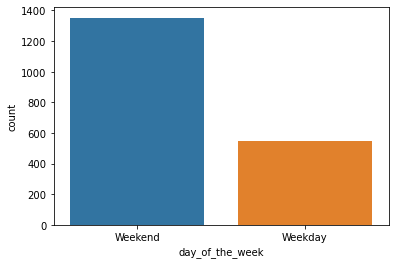

In [13]:
sns.countplot(data=df,x= 'day_of_the_week')
plt.show()

#### Observation:
* It is clear that the order traffic on the weekend is much more than on the weekday (almost 3 times higher)

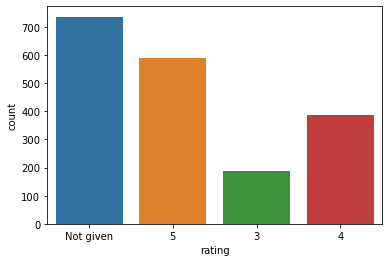

In [14]:
sns.countplot(data=df,x= 'rating')
plt.show()



#### Observation:
* The Not given rating is the most popular among all the orders. The customers providing the feebacks tend to give high rating with 5 is the most common

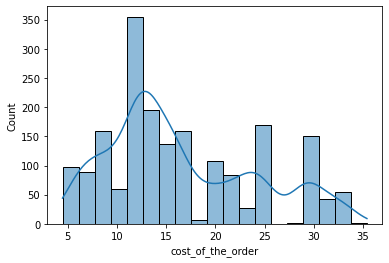

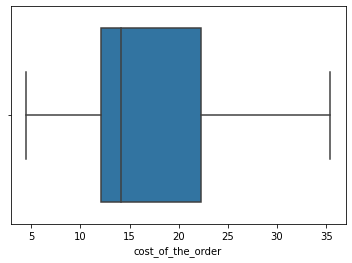

In [15]:
sns.histplot(data=df, x='cost_of_the_order',kde = True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observation:
* The first chart shows that the distrubution is skewed toward the right with the mode value is around 12 usd
* From the second boxplot, there is no outliner. The cost of the order has a median around 14 usd. The maximum order value is 35 usd indicates that the customers are not willing to spend more than 35 usd for food delivery.

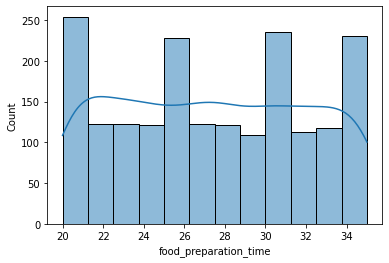

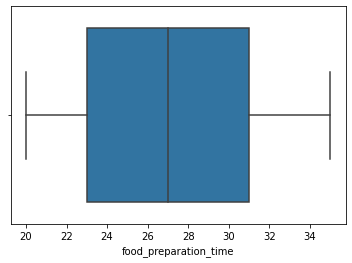

In [16]:
sns.histplot(data=df, x='food_preparation_time',kde = True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observation
* All the value of food preparation time is quite well distributed.
* There is no outliner in the column.
* The median preparation time is 27 minutes while the most common time for the food to be ready is around 21 minutes.

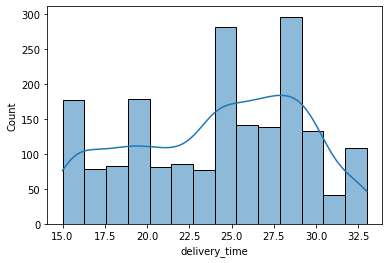

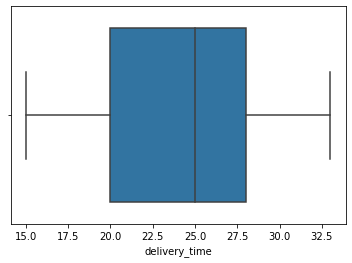

In [17]:
sns.histplot(data=df, x='delivery_time',kde = True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observation:
* The distribution of delivery time is left-skewed and there is no outliner in the column.
* 25 minutes is the median value of the delivery time. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]


In [18]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* Top 5 restaurants with highest number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi , Blue Ribbon Fried Chicken, Parm 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [19]:
df.groupby('cuisine_type')['day_of_the_week'].apply(lambda x: (x=='Weekend').sum()).reset_index(name='count').sort_values(by='count',ascending=False)

,cuisine_type,count
0,American,415
5,Japanese,335
4,Italian,207
1,Chinese,163
8,Mexican,53
3,Indian,49
7,Mediterranean,32
9,Middle Eastern,32
12,Thai,15
2,French,13


#### Observations: 
* The most popular cuisine on the weekend is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [20]:
df['cost_of_the_order'].apply(lambda x: (x>20)).value_counts(normalize=True).reset_index(name='count')


,index,count
0,False,0.708
1,True,0.292


#### Observations:
* The orders cost more than 20 dollars represents 29.2% of the total orders



### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:  
* The average delivery time is around 24.2 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
df.groupby(['customer_id'])[['order_id']].count().sort_values(by='order_id',ascending=False).head(3)


,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
* Customers with id 52832, 47440, 83287	are the top 3 most frequent customers.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


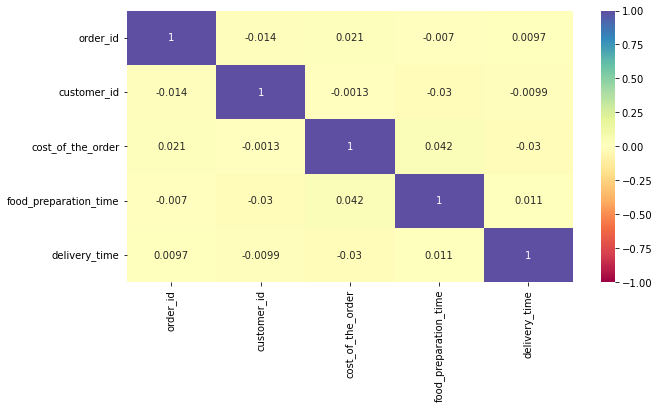

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* The correlations between variables are very week

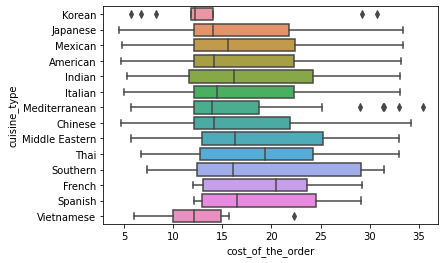

In [24]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.show();

* Vietnamese, Korean and Mediterraneans cuisine have outliner values. The maximum order cost (around 35 usd) is observed in Mediterranean cuisine and the minimum order cost (around 4.5 dollars) belongs to Japanese cuisine.

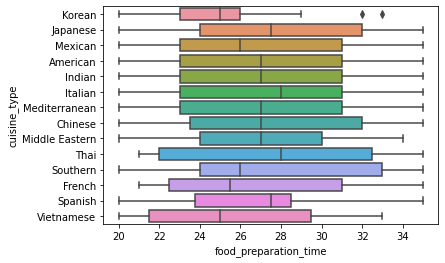

In [25]:
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show();

* Most of the cuisines (except Thai and French) have similar minimum food preparation time of 20 minutes.
* The maximum time for Korean kitchen to prepare their food is only 29 minuties, while other cuisines would take more than 33 minutes.

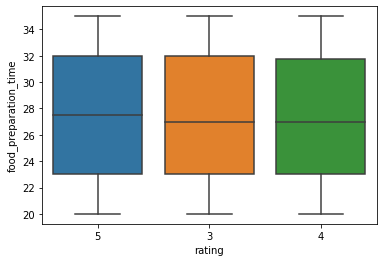

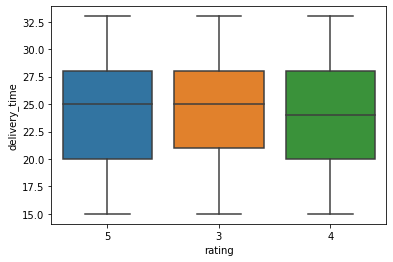

In [26]:
df5 = df[df['rating']!= 'Not given']

sns.boxplot(data=df5,x='rating',y='food_preparation_time',showfliers=False)
plt.show()

sns.boxplot(data=df5,x='rating',y='delivery_time',showfliers=False)
plt.show()



* Customers tend to give good rating for orders with preparation time around 28 minutes and delivery time around 25 minutes

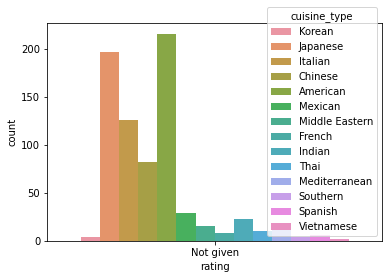

In [27]:
df6 = df[df['rating']== 'Not given']
sns.countplot(data=df6,x='rating', hue = 'cuisine_type')
plt.show()

* From the chart in question 6, we conclude that American, Japanese and Italian are the most popular cuisine for food delivery in New York. Therefore, it makes sense that these cuisines also receive highest non rating orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# create a new dataframe df2 after eliminated all the 'Not given' value in rating column
df2 = df.loc[df['rating'] !='Not given'].copy()

# convert rating column from object to integer
df2['rating'] = df2['rating'].astype(int)

# resetting the index of data frame since some rows will be removed
df2.reset_index(drop=True,inplace=True)

# create a new dataframe df3 with 2 columns restaurant_name and rating (count of rating for each restaurant)
df3 = df2.groupby(['restaurant_name'])[['rating']].count()

# create a new dataframe df5 to calculate the mean of rating for each restaurant
df4 = df2.groupby(['restaurant_name'])[['rating']].mean()



restaurants_for_promotion = pd.merge(df4[df4['rating']>4], df3[df3['rating']>50],on ='restaurant_name')
print(restaurants_for_promotion)


                           rating_x  rating_y
restaurant_name                              
Blue Ribbon Fried Chicken     4.328        64
Blue Ribbon Sushi             4.219        73
Shake Shack                   4.278       133
The Meatball Shop             4.512        84


#### Observations:
* There are 4 restaurant eligible for the promotion which are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
# create a function to calculate the revenue base on the cost of orders
def condition(x):
    if x>20:
        return 0.25 * x
    elif x>5 and x<=20:
        return 0.15 * x
    else:
        return 0
    
# apply function to the dataframe    
df['revenue'] = df['cost_of_the_order'].apply(condition)
print (df['revenue'].sum () ) 


6166.303


#### Observations:
* The revenue generated is 6166 usd 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [30]:
# Create a column total_time to calculate the total time required to deliver the food.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


# using conditional statement to separate column total_time into 2 categories: more than 60 minutes and less than 60 minutes
df.loc[df['total_time'] > 60 , 'total_time_more_than_60'] = 'more_than_60'
df.loc[df['total_time'] <= 60 , 'total_time_more_than_60'] = 'less_than_60'


# calculate the percentage of orders take more than 60 minutes
df['total_time_more_than_60'].value_counts(normalize=True)*100


less_than_60   89.463
more_than_60   10.537
Name: total_time_more_than_60, dtype: float64

#### Observations: 
* There is around 10.5% of the orders take more than 60 minutes


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]




In [31]:
df.groupby(['day_of_the_week'])[['delivery_time']].mean()




,delivery_time
day_of_the_week,
Weekday,28.340
Weekend,22.470


#### Observations:
* The average delivery time on the weekday is 28 minuates, which is 6 minutes longer than delivery time on the weekend (around 22 minutes)

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. It is clearly that around 40% of the orders did not get the rating. Therefore, it is very difficult to conclude which are best restaurants or cuisine loved by New York residents.
2. The orders traffic on weekend is much higher than weekdays
3.  Customers tend to give good rating for orders with total time around 53 minutes (preparation time around 28 minutes and delivery time around 25 minutes)
4. Customers tend to spend 12 usd for each order


### Recommendations:

1. Encourage customers to rate their orders (give a small reward for rated orders)
2. Arrange more food drivers on the weekend to meet the demand
3. Optimize the total delivery time make customers more happy 
4. To generate more revenue, Foodhub shoud charge more fee for order equal and above 12usd (for example, 20% commision instead of applying the same rate 15% for orders above 5usd)



---